In [2]:
!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="e9DZ7QPz5elfKQnGp2Em")
project = rf.workspace("image-segmentation-0uzva").project("aquarium-yym4h-fbfoy")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aquarium-1 in yolov8:: 100%|██████████| 1288/1288 [00:00<00:00, 4837.96it/s]


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.7 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model.train(
    data=f"{dataset.location}/data.yaml",  # dataset config
    epochs=50,                             # number of epochs
    imgsz=640,                             # image size
    batch=16,                              # batch size
    name="roboflow_yolov8_train",          # training name
    device=0                               # use GPU if available
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Aquarium-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

In [6]:
# =========================================================
# 📊 STEP 4: Validate Model
# =========================================================
metrics = model.val()
print("✅ Validation complete!")
print(metrics)


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2577.1±728.1 MB/s, size: 127.3 KB)
val: Scanning /content/Aquarium-1/valid/labels.cache... 95 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 95/95 230.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.9it/s 3.2s
                   all         95        670      0.768      0.679      0.739      0.454
                  fish         47        340      0.825      0.671      0.775      0.424
             jellyfish          5        104      0.775      0.885      0.915       0.53
               penguin         15        100      0.699       0.67      0.711       0.32
                puffin         10         47      0.739      0.532      0.608      0.322
                 shark         22         34     

In [7]:
# =========================================================
# 🔍 STEP 5: Run Inference on Test Images
# =========================================================
# You can test on images from the test set or your own folder
model.predict(source=f"{dataset.location}/test/images", save=True)

print("✅ Predictions saved under: runs/detect/predict/")



image 1/95 /content/Aquarium-1/test/images/IMG_2279_jpeg_jpg.rf.9c9af9b883ea4c25a04d76b7f30b0489.jpg: 640x480 31 fishs, 67.9ms
image 2/95 /content/Aquarium-1/test/images/IMG_2288_jpeg_jpg.rf.a546b74d596b8d27becb78d1bb83d4cd.jpg: 640x480 1 puffin, 8.6ms
image 3/95 /content/Aquarium-1/test/images/IMG_2289_jpeg_jpg.rf.fb0a2788fd7b68fc8329f8c344cc1c4f.jpg: 640x480 1 fish, 1 puffin, 8.2ms
image 4/95 /content/Aquarium-1/test/images/IMG_2301_jpeg_jpg.rf.10e9277bb22c0982058282c0c5301e62.jpg: 640x480 28 penguins, 6.9ms
image 5/95 /content/Aquarium-1/test/images/IMG_2319_jpeg_jpg.rf.24b89cad09b84869f24481248900ab19.jpg: 640x480 6 penguins, 9.5ms
image 6/95 /content/Aquarium-1/test/images/IMG_2323_jpeg_jpg.rf.752afac4da2215a48c00725bdec16822.jpg: 640x480 2 penguins, 7.9ms
image 7/95 /content/Aquarium-1/test/images/IMG_2339_jpeg_jpg.rf.e4184d97b4c0226f82e9b393a9a7237a.jpg: 640x480 1 penguin, 10.0ms
image 8/95 /content/Aquarium-1/test/images/IMG_2347_jpeg_jpg.rf.fb038c51fb18514623ac149fbef30533.jp

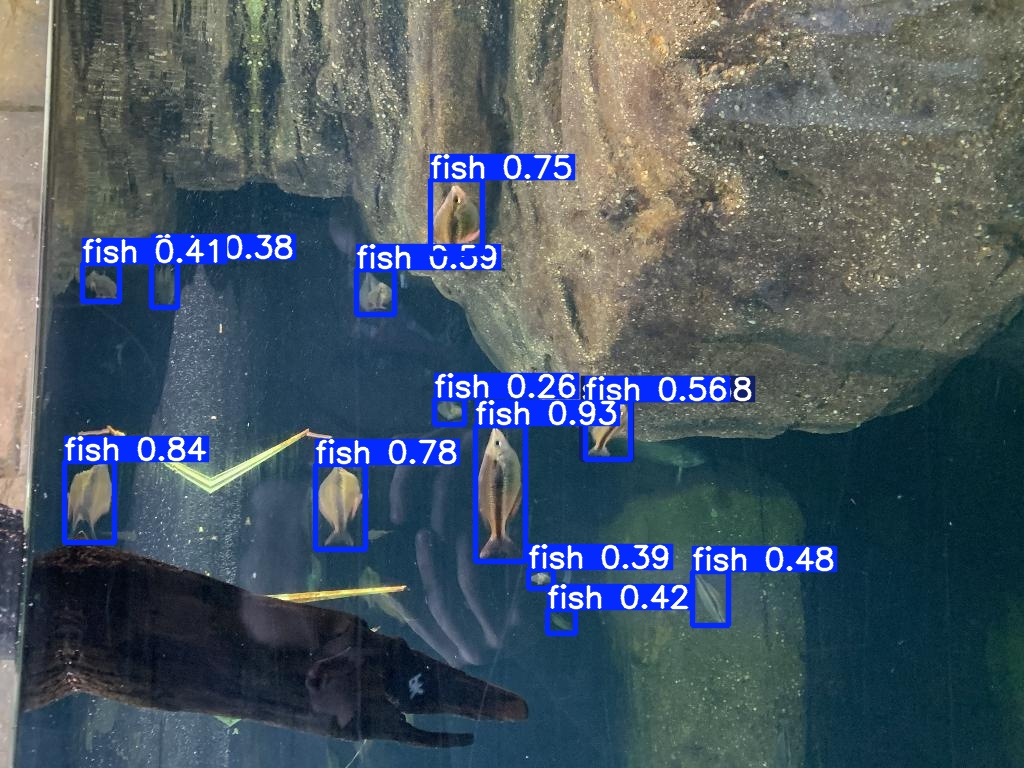

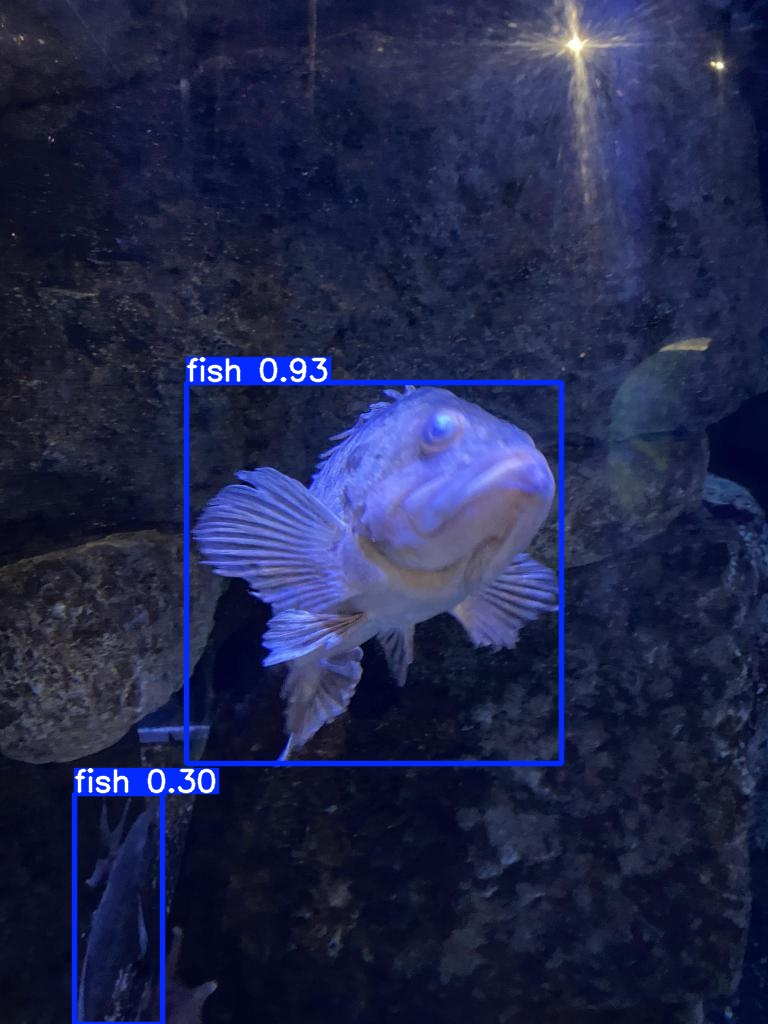

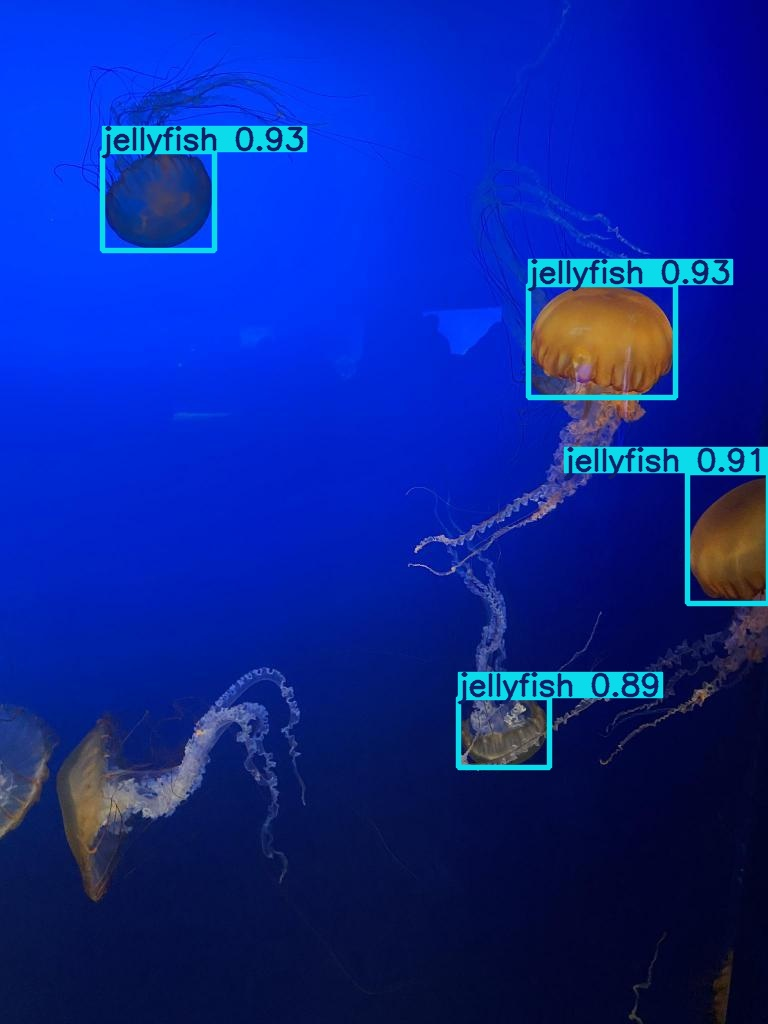

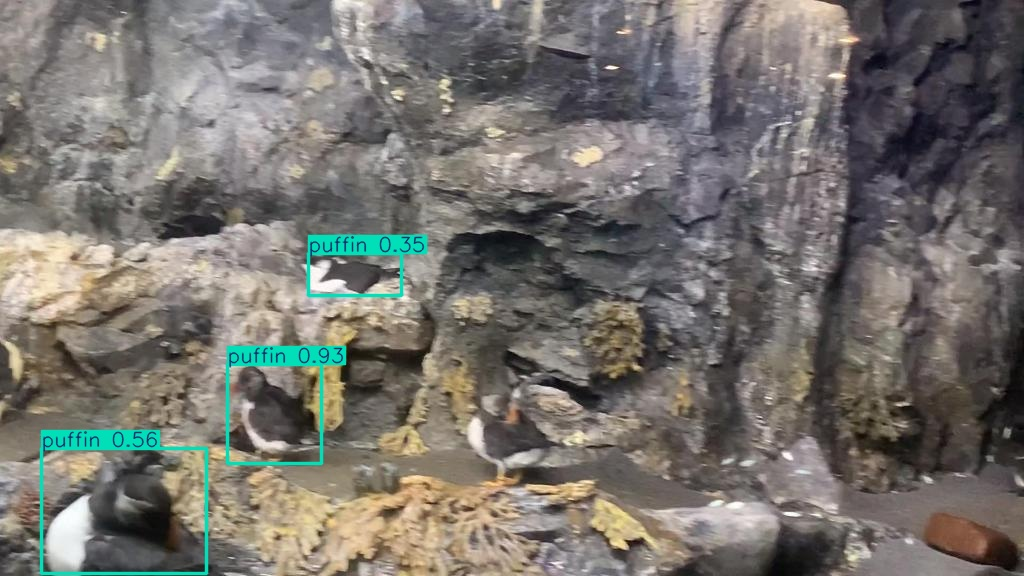

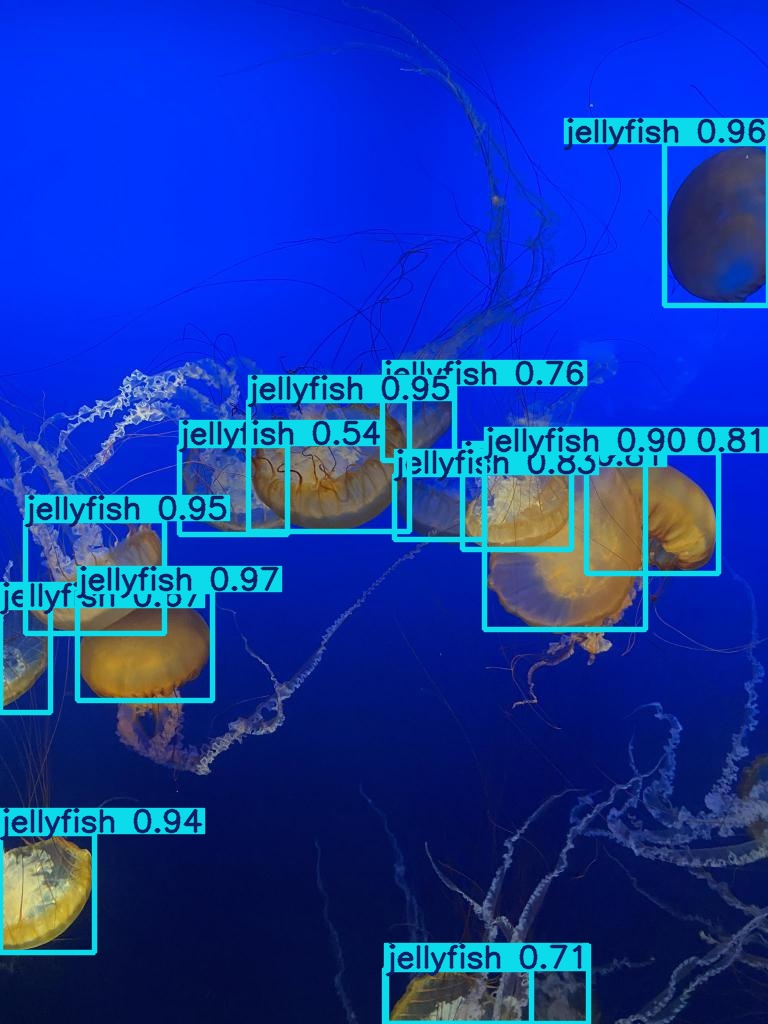

In [8]:
# =========================================================
# 🖼️ STEP 6: View Prediction Results
# =========================================================
from IPython.display import Image, display
import glob

# Display a few prediction results
for image_path in glob.glob("runs/detect/predict/*.jpg")[:5]:
    display(Image(filename=image_path))
